In [1]:
import cv2
img1 = cv2.imread("d:/data/images/img1.jpg")
img1 = cv2.resize(img1, (320, 240))
img2 = cv2.imread("d:/data/images/img2.jpg")
img2 = cv2.resize(img2, (320, 240))
img3 = cv2.imread("d:/data/images/img3.jpg")
img3 = cv2.resize(img3, (320, 240))
img4 = cv2.imread("d:/data/images/img4.jpg")
img4 = cv2.resize(img4, (320, 240))
img5 = cv2.imread("d:/data/images/img5.jpg")
img5 = cv2.resize(img5, (320, 240))

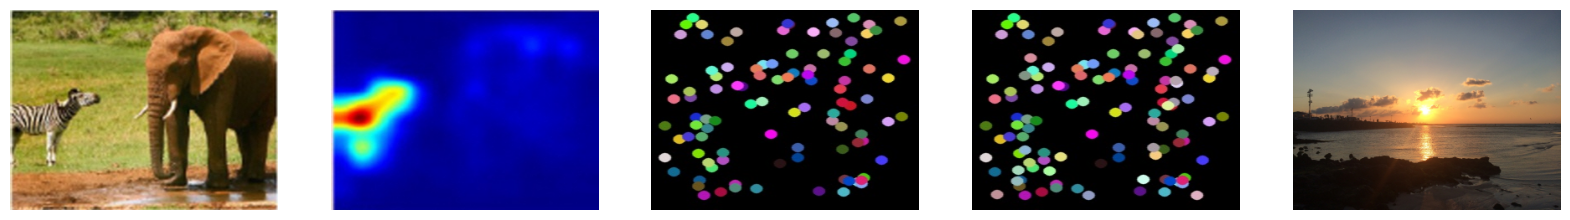

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
for idx,img in enumerate([img1,img2,img3,img4,img5]):
    plt.subplot(1,5,idx+1)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis("off")
plt.show()

In [5]:
img5.shape 

(240, 320, 3)

In [3]:
import numpy as np
# 마스크 선언 및 초기화
mask = np.full(shape=img5.shape, fill_value=0, dtype=np.uint8)
#               (240, 320, 3)      0으로 채움
h, w, _ = img5.shape
x = (int)(w/2) - 60; y = (int)(h/2) - 60
cv2.rectangle(mask, (x,y), (x+120, y+120), (255,255,255), -1)
# 산술 및 논리 연산 수행
ress = []
ress.append(cv2.add(img1, img2))
# 이미지에 가중치를 곱하는 방식
ress.append(cv2.addWeighted(img1, 0.5, img2, 0.5, 0))
ress.append(cv2.subtract(img3, img4))
# 뺄셈 연산을 수행한 후 절대값을 저장하는 방식
ress.append(cv2.absdiff(img3, img4))
ress.append(cv2.bitwise_not(img5))
ress.append(cv2.bitwise_and(img5, mask))

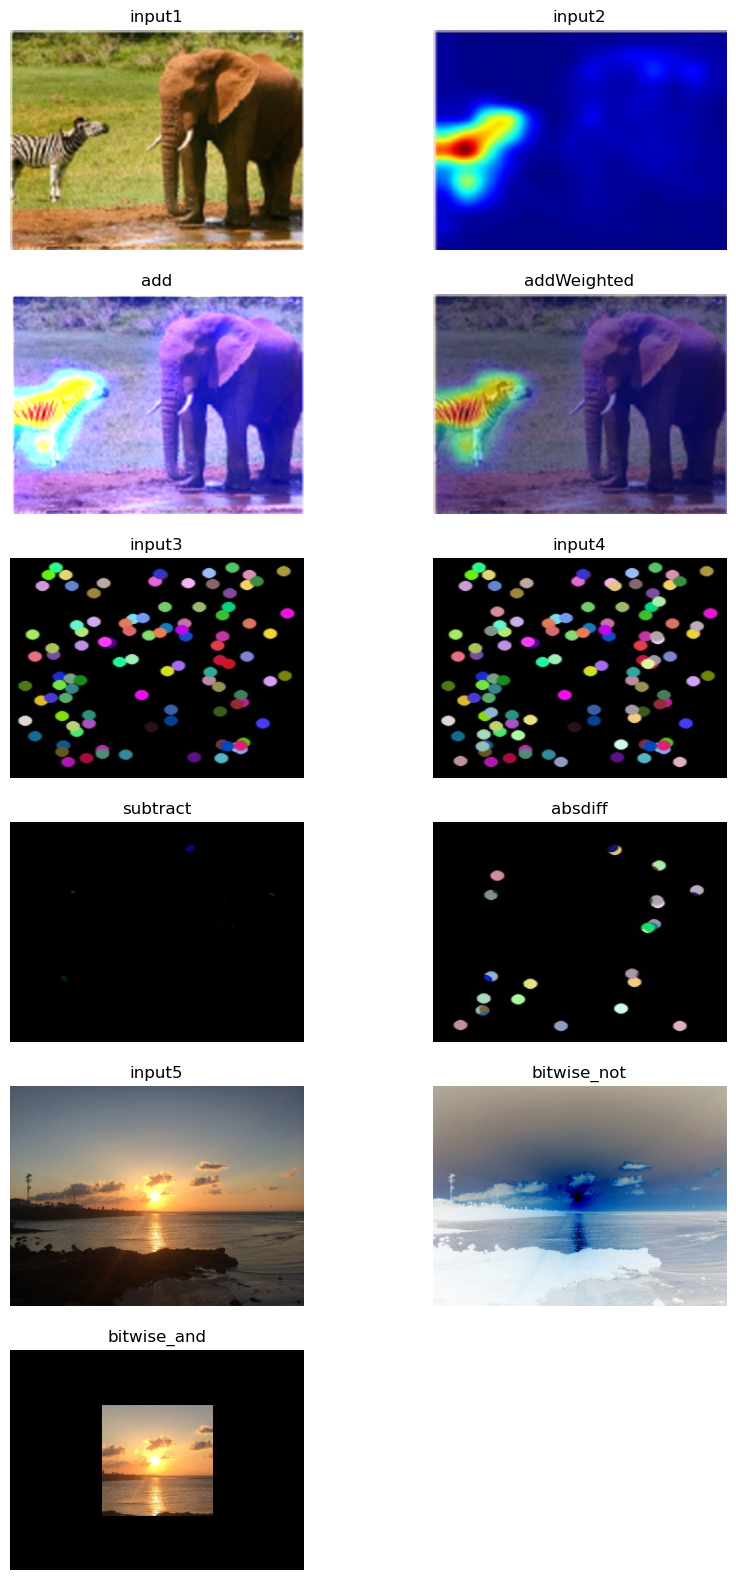

In [4]:
displays = [("input1", img1),
            ("input2", img2),
            ("add", ress[0]),
            ("addWeighted", ress[1]),
            ("input3", img3),
            ("input4", img4),
            ("subtract", ress[2]),
            ("absdiff", ress[3]),
            ("input5", img5),
            ("bitwise_not", ress[4]),
            ("bitwise_and", ress[5]),]
plt.figure(figsize=(10,20))

for idx,(name, out) in enumerate(displays):
    plt.subplot(6,2,idx+1)
    image = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")
plt.show()